### PCA example on MNIST dataset

In [1]:
import sys
import sklearn

import numpy as np
import os
# to make this notebook's output stable across runs
np.random.seed(42)

%matplotlib inline
import matplotlib.pyplot as plt

### Download MNIST dataset 

In [2]:
from sklearn.datasets import fetch_openml


mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)



In [4]:
from sklearn.model_selection import train_test_split
X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
print(X_train.shape)
print(X_test.shape)

(52500, 784)
(17500, 784)


In [31]:
# the value ranges 0-255.
print(X_train[0][200:300])

[  0.   0.   0.   0.   0.   0.   6.   0.   0.   0.   0.   0.   0.  11.
  43. 181. 253. 177.   6.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   7. 207. 254.  25.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.  22. 204. 253.  37.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  14.
  59. 206.]


label = 3


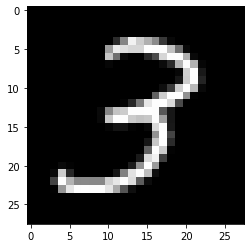

In [33]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0].reshape(28,-1), cmap="gray")
print(f'label = {y_train[0]}')

### Perform PCA on MNIST training set

In [8]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_) #cumlattive contribution 

In [9]:
print(cumsum.shape)

(784,)


In [13]:
print(f' cumulative contribution in the first 100 : \n {cumsum[:101]}')

 cumulative contribution in the first 100 : 
 [0.09751219 0.1691513  0.23103295 0.2848607  0.3338413  0.3769923
 0.40969374 0.43854475 0.46606888 0.48944808 0.51062378 0.53093419
 0.5480698  0.56502591 0.58078819 0.59559064 0.60871721 0.62146299
 0.63331433 0.64488672 0.65556263 0.6656602  0.67518551 0.68425509
 0.69309809 0.70150777 0.70960319 0.7174706  0.72490232 0.73177682
 0.73834477 0.74476642 0.75078245 0.75664366 0.76236645 0.76778267
 0.77282213 0.77771092 0.78248935 0.78716785 0.79170858 0.7961432
 0.80033731 0.80430562 0.80816178 0.81192242 0.81554277 0.81905087
 0.82242709 0.82561899 0.82877559 0.83186824 0.83481891 0.83768041
 0.84051059 0.84320103 0.84588114 0.84845475 0.8509986  0.85343712
 0.85582342 0.85820307 0.86050091 0.86271257 0.86483994 0.86690034
 0.86891667 0.87085856 0.8727674  0.87465316 0.8765257  0.87832515
 0.88008801 0.88181168 0.88345919 0.88509208 0.88670379 0.88825405
 0.88972139 0.89114223 0.8925492  0.89394791 0.89534274 0.89669356
 0.8980216  0.8993

In [18]:
from numpy.linalg import matrix_rank
matrix_rank(X_train)

708

In [28]:
d95 = np.argmax(cumsum >= 0.95) + 1
print(f'Top {d95} principal components preserves more than 95% of the original data (X_train).')

Top 154 principal components preserves more than 95% of the original data (X_train).


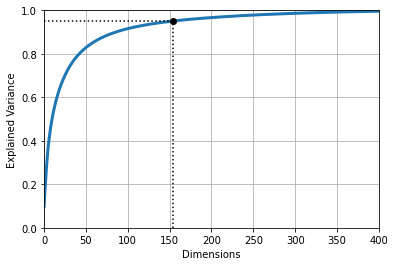

In [27]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d95, d95], [0, 0.95], "k:")
plt.plot([0, d95], [0.95, 0.95], "k:")
plt.plot(d95, 0.95, "ko")
plt.grid(True)
plt.show()

### Compress MNIST data into 50 dim and reconstruct.

In [38]:
# Unitary matrix U ={u1, u2, ..., u784}
U_pca = pca.components_

# variance-covariance matrix 
COV_pca = pca.get_covariance()

# eigenvalue
eigenvalues = pca.explained_variance_

# principal component scores
scores = pca.transform(X_train)

In [37]:
print(eigenvalues[:10])

[334695.66883373 245890.2958388  212399.27634962 184755.52695605
 168118.39260462 148109.22543792 112242.69333809  99026.65564644
  94472.36172314  80245.53534504]


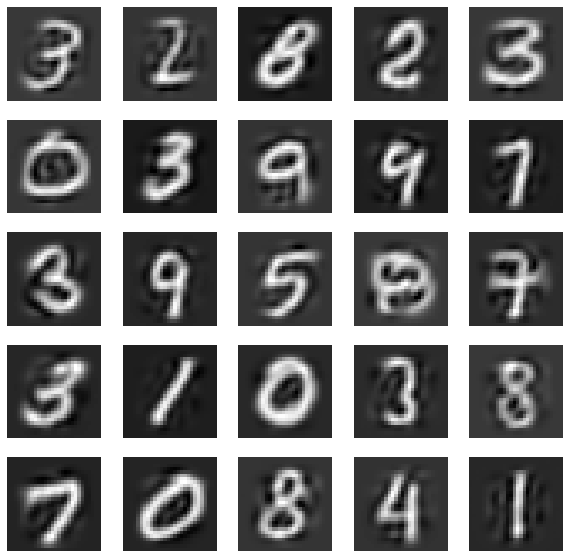

In [59]:
DIM = 50
pcaD = PCA(n_components=DIM)
pcaD.fit(X_train)
scoresD = pcaD.transform(X_train)
Xres = pcaD.inverse_transform(scoresD)

# visualize samples
plt.figure(figsize=(10, 10))
for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(Xres[i].reshape(28,-1), cmap="gray")
    plt.axis("off")